In [1]:
import pandas as pd
import numpy as np
import ast



# Visalization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credits = pd.read_csv(r'..\data\the-movies-dataset\credits.csv')
credits.head(1)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862


In [3]:
# for gender value fixing and file saving
dfnu = pd.read_csv(r'..\data\the-movies-dataset\ready_dfs\dfnu_ready.csv')
gender = lambda x: "Female" if x == 1 else ("Male" if x == 2 else x)

def name_search (df):
    """
                        ---What it does---
    This function searches for values equal to 0 in your df 'gender' column. If it finds them, then compares your df 'name' column of those values with those of dfnu 'name' column. If they mach, the 'gender' value in dfnu is trasnported back to your df.

                        ---What it needs---
    - A df with a 'name' and 'gender' column
    - A df for comparison (dfnu) with 'name' and 'gender' column
    """
    name_split = lambda x: list(x.split(' '))[0]                                    # splits the name using splits, taking only the first name
    
    df['name2'] = df['name'].apply(name_split)
    for e in df.index:
        name = df['name2'].iloc[e]
        if df.loc[e, 'gender'] == 0:                 
            if name in list(dfnu.name): # searches the name in dfnu and overwrites gender when aplicable
                df.loc[e, 'gender'] = list(dfnu.loc[dfnu['name']== name, 'gender'])[0]
    del df['name2']
    print ("Done")

def df_save (df):
    """
                        ---What it does---
    Saves your df of choice to a .csv file in the same directory of the parent file. The file name is up to you, though the function appends '_ready' for easy finding.

                        ---What it needs---
    * Your input for the name (be careful with adding spaces)
    * Your ready-to-save df

                        ---What it returns---
    A .csv file
    """
    name = input("Type the name of your df> ")
    name = name + "_ready.csv"
    df.to_csv(name, sep = ',')

print("Done")

Done


In [4]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
cast    45476 non-null object
crew    45476 non-null object
id      45476 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [5]:
credits.isnull().any()

cast    False
crew    False
id      False
dtype: bool

In [6]:
cast = pd.DataFrame(credits[['id', 'cast']])
crew = pd.DataFrame(credits[['id', 'crew']])

## Cast

In [7]:
cast.iloc[0,0]

862

In [8]:
cast['cast'] = cast['cast'].apply(ast.literal_eval)
cast['cast_size'] = cast['cast'].apply(lambda x: len(x))
cast['cast_order'] = cast['cast'].apply(lambda x: [i['order'] for i in x] if isinstance(x, list) else [])
cast['cast_name'] = cast['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
cast['cast_gender'] = cast['cast'].apply(lambda x: [i['gender'] for i in x] if isinstance(x, list) else [])

In [9]:
cast.head(2)

,id,cast,cast_size,cast_order,cast_name,cast_gender
0,862,"[{'cast_id': 14, 'character': 'Woody (voice)',...",13,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2]"
1,8844,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",26,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, ..."


In [10]:
cast.shape

(45476, 6)

In [11]:
starring_role = []
credits_order = []
actors_name = []
actors_gender = []
actors = {'starring_role': starring_role, 'credits_order': credits_order, 'name': actors_name, 'gender': actors_gender}
for e in range(45476):
    for i in cast.iloc[e, 3]:
        sr = cast.iloc[e, 0]
        starring_role.append(sr)
        credits_order.append(i)
    for i in cast.iloc[e, 4]:
        actors_name.append(i)
    for i in cast.iloc[e, 5]:
        actors_gender.append(i)

actors = pd.DataFrame(actors)
print("Done")

Done


In [12]:
actors['name'].value_counts().head(10)

Bess Flowers         241
Christopher Lee      148
John Wayne           125
Samuel L. Jackson    123
Michael Caine        110
Gérard Depardieu     110
John Carradine       109
Donald Sutherland    109
Jackie Chan          108
Frank Welker         107
Name: name, dtype: int64

The 10 most prolific actors in this dataset. It must be noted that most of the entries correspond with classic actors; therefore it is difficult to try to establish some kind of popularity measure, as most of these actors are dead.

In [13]:
genders = actors.gender.value_counts()
genders

2    226713
0    223964
1    111797
Name: gender, dtype: int64

In [14]:
actors.gender = actors.gender.apply(gender)

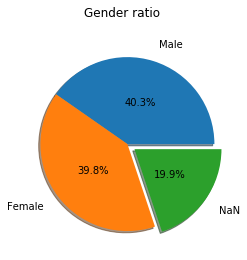

In [15]:
labels = 'Male', 'Female', 'NaN'
explode = 0, 0, 0.1

plt.pie(genders,  autopct='%1.1f%%', startangle=0, explode= explode, labels= labels, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
plt.suptitle('Gender ratio', fontsize=12)

plt.show()

In order to resolve the NaN problem, it was thought that a solution involving the gender asotiation around names was a quick and easy one. As any names has a certain gender assigned to it. For that pourpose a function was developed (gender_search) and a new df created: dfnu (DataFrame Names Unique).

Sadly, it has been realised that a large portion of the NaN values correspond with "foreing" actors and actresses. Foreign not in the sense of nationality, but language, as is understood in the "metadata" csv.

Knowing that dfnu contains a majority of english names of both genders (as it originates from the scottish National Records), it will be used to determine the number of english and none-english names.

In [16]:
name_search(actors)

Done


In [17]:
genders2 = actors.gender.value_counts()
genders2

Male      350851
Female    169221
0          42402
Name: gender, dtype: int64

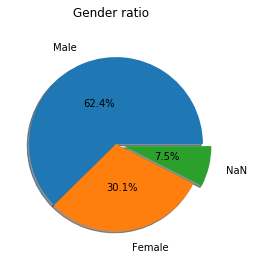

In [18]:
labels = 'Male', 'Female', 'NaN'
explode = 0, 0, 0.1

plt.pie(genders2,  autopct='%1.1f%%', startangle=0, explode= explode, labels= labels, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
plt.suptitle('Gender ratio', fontsize=12)

plt.show()

As the grahp shows, the NaN values have been reduced by more than half. The 7.5% of latter data is explained by the presence of not latin-based alphabets, uncomon names and nationalities not represented in dfnu because of the dificulty into securing the relevant data.

Since the NaN data has been drasticly reduced, the rest of the NaN values will be deleted.

In [19]:
actors = actors.replace(0, np.nan).dropna()

In [20]:
genders3 = actors.gender.value_counts()
genders3

Male      325617
Female    159232
Name: gender, dtype: int64

In [59]:
roles = actors['credits_order'].value_counts().head(5)
roles

1.0    39239
2.0    37930
3.0    36610
4.0    34435
5.0    31990
Name: credits_order, dtype: int64

In [52]:


gender_and_roles = actors.groupby('credits_order')['gender'].value_counts().head(10)
gender_and_roles 

credits_order  gender
1.0            Male      23100
               Female    16139
2.0            Male      23481
               Female    14449
3.0            Male      23419
               Female    13191
4.0            Male      22719
               Female    11716
5.0            Male      21466
               Female    10524
Name: gender, dtype: int64

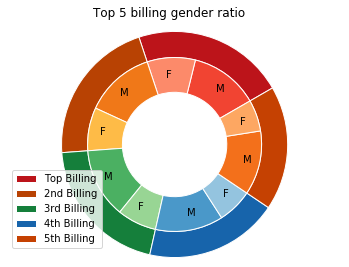

In [61]:
labels = ['Top Billing', '2nd Billing', '3rd Billing', '4th Billing', '5th Billing']
group_size = roles
labels2 = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F']
subgroup_size = gender_and_roles
 
# Create colors
a, b, c, d, e = [ plt.cm.Reds, plt.cm.YlOrBr, plt.cm.Greens, plt.cm.Blues, plt.cm.Oranges]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius = 1.3, colors=[a(0.8), b(0.8), c(0.8), d(0.8), e(0.8)],  startangle = 30)
plt.setp( mypie, width=0.3, edgecolor ='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labeldistance=0.8, colors=[a(0.6), a(0.4), b(0.6), b(0.4), c(0.6), c(0.4), d(0.6), d(0.4), e(0.6), e(0.4)], labels = labels2, startangle = 30)
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
plt.legend(labels, loc= 'best')
plt.suptitle('Top 5 billing gender ratio', fontsize=12) 
plt.show()

In [21]:
df_save(actors)

## Credits

In [22]:
# Lambdas for data extraction. The return data is introduced into a list in order to better operate with it in the future. They cover the director, producer and writer roles. Though many more remain unexplored.

director_name = lambda x: [i['name']for i in x if i['department'] == 'Directing']
director_gender = lambda x: [i['gender']for i in x if i['department'] == 'Directing']

producer_name = lambda x: [i['name']for i in x if i['department'] == 'Production']
producer_gender = lambda x: [i['gender']for i in x if i['department'] == 'Production']

writer_name = lambda x: [i['name']for i in x if i['department'] == 'Writing']
writer_gender = lambda x: [i['gender']for i in x if i['department'] == 'Writing']

In [23]:
# crew = crew.set_index('id')

In [24]:
crew['crew'] = crew['crew'].apply(ast.literal_eval)
crew['crew_len'] = crew['crew'].apply(lambda x: len(x))

# director data
crew['director'] = crew['crew'].apply(director_name)
crew['director_gender'] = crew['crew'].apply(director_gender)

# producer data
crew['producer'] = crew['crew'].apply(producer_name)
crew['producer_gender'] = crew['crew'].apply(producer_gender)

# writer data
crew['writer'] = crew['crew'].apply(writer_name)
crew['wirter_gender'] = crew['crew'].apply(writer_gender)

In [25]:
crew.head()

,id,crew,crew_len,director,director_gender,producer,producer_gender,writer,wirter_gender
0,862,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",106,"[John Lasseter, Roman Figun, Desirée Mourad]","[2, 0, 0]","[Bonnie Arnold, Ed Catmull, Ralph Guggenheim, ...","[1, 0, 2, 2, 0, 0, 0, 1, 0]","[Joss Whedon, Andrew Stanton, Joel Cohen, Alec...","[2, 2, 2, 0, 2, 2, 0, 2]"
1,8844,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",16,[Joe Johnston],[2],"[Larry J. Franco, Nancy Foy, Scott Kroopf, Ted...","[2, 0, 2, 2, 2, 2]","[Jonathan Hensleigh, Chris van Allsburg, Greg ...","[2, 2, 2, 2]"
2,15602,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",4,[Howard Deutch],[2],[],[],"[Mark Steven Johnson, Mark Steven Johnson]","[2, 2]"
3,31357,"[{'credit_id': '52fe44779251416c91011acb', 'de...",10,[Forest Whitaker],[2],"[Ronald Bass, Ezra Swerdlow, Deborah Schindler...","[0, 2, 1, 0, 0]","[Ronald Bass, Terry McMillan, Terry McMillan]","[0, 0, 0]"
4,11862,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",7,[Charles Shyer],[2],[Nancy Meyers],[1],"[Nancy Meyers, Albert Hackett]","[1, 2]"


In [26]:
crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 9 columns):
id                 45476 non-null int64
crew               45476 non-null object
crew_len           45476 non-null int64
director           45476 non-null object
director_gender    45476 non-null object
producer           45476 non-null object
producer_gender    45476 non-null object
writer             45476 non-null object
wirter_gender      45476 non-null object
dtypes: int64(2), object(7)
memory usage: 3.1+ MB


In [27]:
movie_id = []
directors_name = []
directors_gender = []
directors = {'movie_id': movie_id, 'name': directors_name, 'gender': directors_gender}
for e in range(list(crew.shape)[0]):
    for i in crew.iloc[e, 3]:
        idm = crew.iloc[e, 0]
        movie_id.append(idm)
        directors_name.append(i)
    for i in crew.iloc[e, 4]:
        directors_gender.append(i)
directors = pd.DataFrame(directors)
print("Done")

Done


In [28]:
directors.head(6)

,movie_id,name,gender
0,862,John Lasseter,2
1,862,Roman Figun,0
2,862,Desirée Mourad,0
3,8844,Joe Johnston,2
4,15602,Howard Deutch,2
5,31357,Forest Whitaker,2


In [29]:
movie_id = []
producers_name = []
producers_gender = []
producers = {'movie_id': movie_id, 'name': producers_name, 'gender': producers_gender}
for e in range(45476):
    for i in crew.iloc[e, 5]:
        idm = crew.iloc[e, 0]
        movie_id.append(idm)
        producers_name.append(i)
    for i in crew.iloc[e, 6]:
        producers_gender.append(i)
producers = pd.DataFrame(producers)
print("Done")

Done


In [30]:
producers.head(6)

,movie_id,name,gender
0,862,Bonnie Arnold,1
1,862,Ed Catmull,0
2,862,Ralph Guggenheim,2
3,862,Steve Jobs,2
4,862,Karen Robert Jackson,0
5,862,Lori Lombardo,0


In [31]:
directors['gender'] = directors['gender'].apply(gender)
producers['gender'] = producers['gender'].apply(gender)

In [32]:
pro_gend_count = producers.gender.value_counts()
dir_gend_count = directors.gender.value_counts()
print(f'Directors:\n{dir_gend_count}\n\nProducers:\n{pro_gend_count}')

Directors:
Male      28704
0         26234
Female     3196
Name: gender, dtype: int64

Producers:
0         47845
Male      34207
Female    12446
Name: gender, dtype: int64


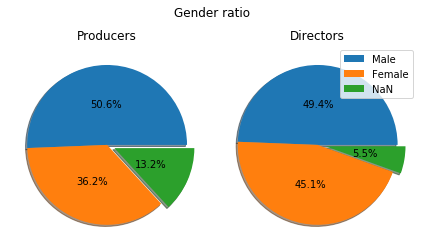

In [33]:
data1 = pro_gend_count
data2 = dir_gend_count

labels = 'Male', 'Female', 'NaN'
explode = 0, 0, 0.1

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)



# plot each pie chart in a separate subplot
ax1.pie(data1, autopct='%1.1f%%', startangle=0, explode= explode, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
ax2.pie(data2, autopct='%1.1f%%', startangle=0, explode= explode, shadow= True, pctdistance = 0.5, labeldistance = 1.2)


# Legend and titles
plt.legend(labels, loc= 'best')
plt.suptitle('Gender ratio', fontsize=12)
ax1.set_title("Producers", loc='center', y=1)
ax2.set_title("Directors", loc='center', y=1)

plt.tight_layout()
plt.show()

The number of NaN values is much higher than expected. NaN values have been observed in both genders. In order to continue with the clean-up process, the "name_search" fucntion is deployed.

In [34]:
name_search(producers)
name_search(directors)

Done
Done


In [35]:
producers = producers.replace(0, np.nan).dropna()
directors = directors.replace(0, np.nan).dropna()

In [36]:
pro_gend_count2 = producers.gender.value_counts()
dir_gend_count2 = directors.gender.value_counts()
print(f'Directors:\n{dir_gend_count2}\n\nProducers:\n{pro_gend_count2}')

Directors:
Male      45593
Female     7785
Name: gender, dtype: int64

Producers:
Male      64088
Female    23345
Name: gender, dtype: int64


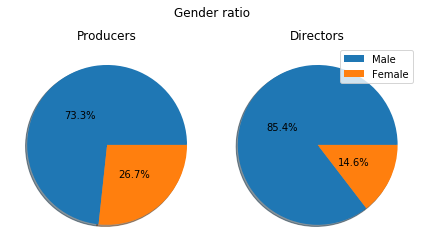

In [37]:
data1 = pro_gend_count2
data2 = dir_gend_count2

labels = 'Male', 'Female'
explode = 0, 0

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)



# plot each pie chart in a separate subplot
ax1.pie(data1, autopct='%1.1f%%', startangle=0, explode= explode, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
ax2.pie(data2, autopct='%1.1f%%', startangle=0, explode= explode, shadow= True, pctdistance = 0.5, labeldistance = 1.2)


# Legend and titles
plt.legend(labels, loc= 'best')
plt.suptitle('Gender ratio', fontsize=12)
ax1.set_title("Producers", loc='center', y=1)
ax2.set_title("Directors", loc='center', y=1)

plt.tight_layout()
plt.show()

In [38]:
df_save(producers)
df_save(directors)